# Kaglle: Pima Indian Diabetes Database 
## Previs√£o de Machine Learning no desenvolvimento da Diabetes 




### ETAPA 1 ‚Äî Entendimento e Tratamento dos Dados
Objetivo: preparar os dados corretamente para alimentar o modelo de ML.

**Detalhes sobre o banco de dados:**
- Pima Indian Diabetes Database - fonte: Kaggle (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
- Este dataset possui 768 registros v√°lidos de mulheres com pelo menos 21 anos de idade e ascend√™ncia "Pima Indian".
- Origem: O dataset foi coletado pelo National Institute of Diabetes and Digestive and Kidney Diseases dos EUA.
- Popula√ß√£o estudada: Mulheres Pima de pelo menos 21 anos de idade, que vivem no estado do Arizona.
- Motivo do estudo: O povo Pima tem uma das maiores taxas conhecidas de diabetes tipo 2 no mundo, o que motivou diversos estudos cl√≠nicos e epidemiol√≥gicos.



#### 1.1 Defini√ß√£o do problema


**O que estou tentando prever ou classificar?**

A possibilidade de diabetes (ou alta probabilidade de desenvolvimento) em mulheres de acordo com a intera√ß√£o entre os seguintes fatores de sa√∫de/ambientais:

```- Coluna                        Descri√ß√£o
- Pregnancies                   N√∫mero de vezes que a paciente j√° esteve gr√°vida.
- Glucose	                N√≠vel de glicose no plasma, em jejum (mg/dL).
- BloodPressure	                Press√£o arterial diast√≥lica (mm Hg).
- SkinThickness	                Espessura da dobra cut√¢nea do tr√≠ceps (em mm) ‚Äî um indicativo de gordura subcut√¢nea.
- Insulin	                N√≠vel s√©rico de insulina 2 horas ap√≥s ingest√£o de glicose (ŒºU/mL).
- BMI	                        √çndice de Massa Corporal (peso em kg dividido pelo quadrado da altura em metros).
- DiabetesPedigreeFunction      Fun√ß√£o de hist√≥rico familiar de diabetes ‚Äî quanto maior, maior a propens√£o gen√©tica.
- Age	                        Idade da paciente (em anos).
- Outcome	                Resultado: 1 se a paciente tem diabetes, 0 se n√£o tem. (essa √© a vari√°vel alvo).```

- Vari√°vel alvo (y): Outcome - 1 para diabetes, 0 para n√£o diabetes.

#### Qual o impacto pr√°tico desta previs√£o? 

- Este estudo tem por objetivo o aprendizado de t√©cnicas de tratamento de dados, Machine Learning e Deploy do modelo em Flask e HTML; 
- Pode servir como indicador de par√¢metros de sa√∫de a serem observados para evitar o surgimento da diabetes;
- Pode conscientizar us√°rios deste sistema preditivo, para que atrav√©s do resultado da previs√£o, busquem informa√ß√µes m√©dicas sobre seu estado de sa√∫de. 

#### 1.2 Coleta de dados:

In [1]:
import sklearn
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
arquivo = pd.read_csv('C:/Projetos/Python/Projetos_IA/01_Modelos_B√°sicos/Diabetes/dados/diabetes.csv')

#### 1.3 Analise dos dados (explora√ß√£o)
- Ver tipos de vari√°veis (num√©ricas, categ√≥ricas)
- Procurar valores faltantes, duplicados
- Ver distribui√ß√£o, correla√ß√µes


In [3]:
#Linhas e colulas:
arquivo.shape

(768, 9)

In [4]:
#Amostra cabe√ßalho do arquivo
arquivo.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
#Amostra de dados - tail = cauda = final do arquivo
arquivo.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [6]:
#Info (procurando por valores em brancos ou nulos)
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#Conferindo...
arquivo.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### An√°lise de dados zerados
Abaixo mostra quantos zeros h√° em cada coluna. Apesar de n√£o ter encontrado dados nulos, neste caso, eles vem mascarados em forma de resultado "zero". 
N√£o faz sentido ter glicose zero, press√£o zero, gordura corporal zero, insulina zero e √≠ndice de gordura corporal zero. 

In [8]:
# Mostra quantos zeros h√° em cada coluna. Apesar de n√£o ter encontrado dados nulos, neste caso, eles vem mascarados em forma de resultado "zero". 
# N√£o faz sentido ter glicose zero, press√£o zero, gordura corporal zero, insulina zero e √≠ndice de gordura corporal zero. 

colunas_com_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for coluna in colunas_com_zero:
    total_zeros = (arquivo[coluna] == 0).sum()
    print(f'{coluna}: {total_zeros} zeros')

Glucose: 5 zeros
BloodPressure: 35 zeros
SkinThickness: 227 zeros
Insulin: 374 zeros
BMI: 11 zeros


In [9]:
# Cria uma m√°scara booleana onde cada linha √© True se tiver pelo menos um zero
mascara_zeros = (arquivo[colunas_com_zero] == 0).any(axis=1)

# Conta quantas linhas t√™m ao menos um zero
total_linhas_com_zero = mascara_zeros.sum()

print(f"Total de linhas com pelo menos um zero em {colunas_com_zero}: {total_linhas_com_zero}")


Total de linhas com pelo menos um zero em ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']: 376


##### Observa√ß√µes importantes:
Muitos valores "0" em colunas como Glucose, BloodPressure, BMI, Insulin, etc., s√£o biologicamente imposs√≠veis. Eles representam dados ausentes.

Escolher estrat√©gia a adotar:
- Tratar esses zeros como NaN, e aplicar uma estrat√©gia de imputa√ß√£o (como m√©dia, mediana ou KNN Imputer);
- **Eliminar os registros com zero;** 
- Estrat√©gia mista, eliminando registros de algumas vari√°veis e colocando a mediana em outros, por exemplo.

A coluna DiabetesPedigreeFunction, apesar de altamente preditora, n√£o faz sentido para o usu√°rio final, visto que √© uma vari√°vel espec√≠fica criada
para o estudo de caso desta base de dados. Nos casos reais os m√©dicos n√£o calculam essa fun√ß√£o. Eles apenas perguntam sobre parentes e ascendentes
pr√≥ximos com diabetes. Sendo assim, devemos excluir esta coluna, pois o usu√°rio final n√£o saber√° preencher esta op√ß√£o de maneira v√°lida e utilit√°ria.

#### Decis√£o:

Optei por eliminar os registros com valores zerados nas colunas cr√≠ticas (como glicose, press√£o arterial e √≠ndice de massa corporal), pois esses valores representam aus√™ncias de dados biologicamente imposs√≠veis. Imputar tais valores com m√©dias, medianas ou mesmo algoritmos preditivos poderia introduzir distor√ß√µes estat√≠sticas ou refor√ßar padr√µes existentes, criando vi√©s de confirma√ß√£o. Embora essa decis√£o reduza substancialmente o tamanho da base de dados, ela evita adultera√ß√µes artificiais nos dados e ser√° justificada se o modelo treinado demonstrar boa capacidade de generaliza√ß√£o com os registros restantes.


In [10]:
# Cria novo DataFrame sem linhas com zero em nenhuma dessas colunas
# Como temos um total de 768 registros e 376 possuem os zeros indesej√°veis, o novo arquivo ter√° 392 registros (51% do tamanho original)
novo_arquivo = arquivo.loc[(arquivo[colunas_com_zero] != 0).all(axis=1)].copy()

In [11]:
# Eliminando a coluna DiabetesPedigreeFunction em ambos os arquivos para compara√ß√µes de correla√ß√£o (mais abaixo)

arquivo = arquivo.drop('DiabetesPedigreeFunction', axis=1)
novo_arquivo = novo_arquivo.drop('DiabetesPedigreeFunction', axis=1)

In [12]:
# Informa√ß√µes do novo arquivo. Reduziu praticamente pela metade o n√∫mero de registros
novo_arquivo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    392 non-null    int64  
 1   Glucose        392 non-null    int64  
 2   BloodPressure  392 non-null    int64  
 3   SkinThickness  392 non-null    int64  
 4   Insulin        392 non-null    int64  
 5   BMI            392 non-null    float64
 6   Age            392 non-null    int64  
 7   Outcome        392 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 27.6 KB


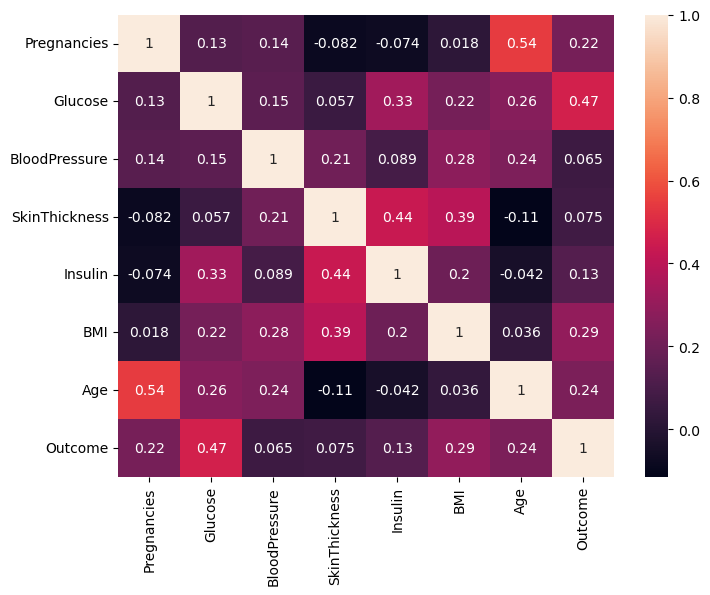

In [13]:
# Mapa de Correla√ß√£o dos dados integrais (mantendo registros zerados)
plt.figure(figsize = (8,6))
corr = arquivo.corr()
sns.heatmap(corr, annot = True);

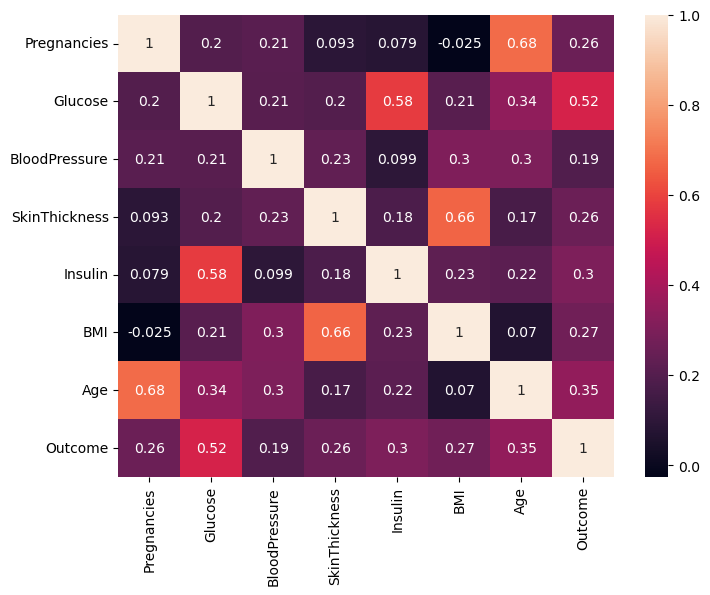

In [14]:
# Mapa de Correla√ß√£o dos novos dados, excluindo linhas com zero em alguma das colunas 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'
plt.figure(figsize = (8,6))
corr = novo_arquivo.corr()
sns.heatmap(corr, annot = True);

#### Comparativo entre os dois heatmaps (com zeros x sem zeros)

- Glucose: 0.47 x 0.52 - Aumentou. agora o modelo ver√° melhor a rela√ß√£o glicose/diabetes.  
- Insulin: 0.13 x 0.30 - Mais que dobrou. Evid√™ncia de que os zeros estavam distorcendo a informa√ß√£o real.  
- SkinThickness: 0.075 x 0.26 - Aumentou bastante. Zeros estavam mascarando correla√ß√µes.  
- BMI: 0.29 x 0.27 - Pouca varia√ß√£o. Sinal de estabilidade.  
- BloodPressure: 0.065 x 0.19 - Triplicou a correla√ß√£o.  
- Pregnancies: 0.22 x 0.26 - Leve aumento.  
- Age: 0.24 x 0.35 - Relev√¢ncia subestimada antes.  

##### Conclus√£o: manter os zeros distorce significativamente as correla√ß√µes reais.

#### O dataset com dados limpos:
- Mostra rela√ß√µes mais fortes com a vari√°vel alvo.
- Reduz o ru√≠do estat√≠stico introduzido por zeros inv√°lidos.
- √â muito mais adequado para treinamento de um modelo confi√°vel.

#### Reflex√£o:
O segundo gr√°fico comprova a intui√ß√£o inicial:
‚ÄúMelhor treinar com menos dados, mas com dados limpos, do que com mais linhas cheias de ru√≠do.‚Äù

##### O resultado √© um modelo mais realista, clinicamente coerente e com maior capacidade preditiva.

#### 1.4 Pr√©-processamento dos dados:
- Tratar dados faltantes
- Codificar vari√°veis categ√≥ricas (LabelEncoder, OneHotEncoder, etc.)
- Normalizar / padronizar vari√°veis num√©ricas (com StandardScaler, por exemplo)
- Separar X (entradas) e y (alvo)

In [16]:
# Separar x e y para o modelo de regress√£o:
# Separar X (entradas) e y (alvo: Outcome)
X = novo_arquivo.drop(columns=['Outcome'])  # Exclui a vari√°vel alvo Outcome.
y = novo_arquivo['Outcome']

In [17]:
# Divis√£o em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
# imprime o shape dos datasets de treino e teste
print(f"Shape de X_treino :{X_treino.shape}\nShape de X_teste: {X_teste.shape}",
      f"\nShape de y_treino: {y_treino.shape}\nShape de y_teste: {y_teste.shape}")

Shape de X_treino :(313, 7)
Shape de X_teste: (79, 7) 
Shape de y_treino: (313,)
Shape de y_teste: (79,)


In [19]:
# Cria o padronizador
scaler = StandardScaler()

# Fit e transform somente em treino
X_treino_scaled = scaler.fit_transform(X_treino)

# Transform em teste (e em novos dados)
X_teste_scaled = scaler.transform(X_teste)

# Vide mais informa√ß√µes sobre o correto do uso do scaller no readme

In [20]:
X_treino_scaled

array([[-1.02718262e+00,  1.86334398e+00,  1.51359244e+00, ...,
        -5.85300013e-01,  4.66955416e-01,  3.82185098e-01],
       [-7.22078871e-02, -1.37262755e+00,  1.19953581e+00, ...,
        -7.88543839e-01, -8.15248900e-01, -8.59916471e-01],
       [ 1.51941667e+00,  9.82686032e-02,  1.35656412e+00, ...,
        -4.32867143e-01,  7.51889709e-01,  1.71983294e+00],
       ...,
       [-1.02718262e+00, -1.95910627e-01, -3.70747369e-01, ...,
         2.44612278e-01, -3.45107317e-01, -8.59916471e-01],
       [-7.22078871e-02,  2.08859943e-04,  2.29873403e+00, ...,
         6.84973902e-01,  3.43027206e+00, -8.59916471e-01],
       [ 1.83774158e+00, -3.59343532e-01,  8.85479170e-01, ...,
         1.34521872e-01,  1.39280980e-01,  4.77731373e-01]])

In [21]:
X_teste_scaled

array([[ 1.20109176e+00, -6.86209343e-01,  2.57365900e-01,
         1.01614390e+00, -4.58272621e-01,  5.66682419e-01,
         1.33764784e+00],
       [-1.02718262e+00,  1.30955184e-01,  7.28450853e-01,
         7.36249763e-01,  4.30919119e-01,  4.38461987e-01,
        -7.64370197e-01],
       [ 2.46117024e-01, -1.24188122e+00, -9.98860639e-01,
        -6.63220941e-01, -9.32508216e-01, -7.72508756e-01,
        -2.86638824e-01],
       [-1.02718262e+00,  1.27498552e+00,  4.14394218e-01,
         2.50891266e+00, -5.00615085e-01,  2.84615676e+00,
        -5.73277648e-01],
       [-1.02718262e+00,  1.89603056e+00,  1.35656412e+00,
         1.38933609e+00,  2.97146695e+00,  1.43573201e+00,
        -4.77731373e-01],
       [-7.22078871e-02, -8.82328830e-01, -1.15588896e+00,
         4.56355623e-01, -3.73587694e-01, -1.21415691e+00,
         7.64370197e-01],
       [-7.08857709e-01, -1.69949336e+00, -1.78400223e+00,
        -1.03641313e+00, -7.03858912e-01, -1.82676564e+00,
        -8.5991647

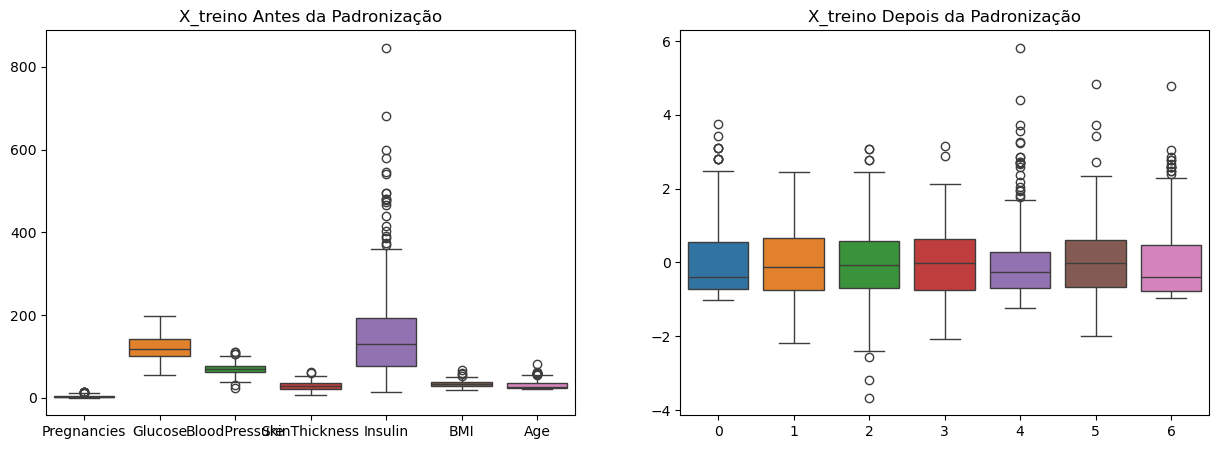

In [22]:
# Cria uma figura e um conjunto de subplots.
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

# Primeiro subplot para X_train antes da padroniza√ß√£o
sns.boxplot(data = X_treino, ax = ax[0])
ax[0].set_title('X_treino Antes da Padroniza√ß√£o')

# Segundo subplot para X_treino ap√≥s a padroniza√ß√£o
sns.boxplot(data = X_treino_scaled, ax = ax[1])
ax[1].set_title('X_treino Depois da Padroniza√ß√£o')

plt.show()

### ETAPA 2 - Criar e treinar o modelo de ML

Objetivo: criar o modelo, treinar, fazer previs√£o, melhorar o modelo... salvar o modelo treinado e os transformadores. Encapsular o processo de pr√©-processamento + modelo em um fluxo seguro, test√°vel e pronto para salvar.

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Treina o modelo 1 - Dados originais...
modelo_arvore = DecisionTreeClassifier(max_depth=4, class_weight='balanced', random_state=42)
modelo_arvore.fit(X_treino_scaled, y_treino)

# Faz previs√µes
y_pred = modelo_arvore.predict(X_teste_scaled)

# Avalia√ß√£o
print("Acur√°cia:", accuracy_score(y_teste, y_pred))
print("\nRelat√≥rio de Classifica√ß√£o:\n", classification_report(y_teste, y_pred))

Acur√°cia: 0.7468354430379747

Relat√≥rio de Classifica√ß√£o:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80        52
           1       0.61      0.70      0.66        27

    accuracy                           0.75        79
   macro avg       0.72      0.74      0.73        79
weighted avg       0.76      0.75      0.75        79



In [24]:
# Justifica o class_weight='balanced no quadro acima, que for√ßa o modelo a "valorizar" mais a classe minorit√°ria
y_treino.value_counts() 

Outcome
0    210
1    103
Name: count, dtype: int64

In [25]:
from sklearn.model_selection import cross_val_score


# Faz valida√ß√£o cruzada com 5 folds. Com isso, podemos ver a consist√™ncia do modelo e se est√° havendo overfiting. 

resultados = cross_val_score(modelo_arvore, X, y, cv=5, scoring='accuracy')

print("Acur√°cias em cada fold:", resultados)
print("Acur√°cia m√©dia:", resultados.mean())

Acur√°cias em cada fold: [0.73417722 0.69620253 0.80769231 0.84615385 0.76923077]
Acur√°cia m√©dia: 0.7706913339824732


#### Interpreta√ß√£o dos resultados:

- H√° uma varia√ß√£o esperada entre os folds, mas nenhum valor √© muito discrepante.

- Isso indica que o modelo √© est√°vel e n√£o est√° superajustado (overfitted) nem mal ajustado.

- Acur√°cia m√©dia: 0.7706

- Esse valor √© quase id√™ntico ao que j√° tinhamos conseguido com o hold-out (divis√£o simples treino/teste).

- A valida√ß√£o cruzada confirmou que o modelo generaliza bem nos dados.

#### Conclus√£o t√©cnica at√© aqui
- O modelo de Decision Tree com max_depth=4 e class_weight='balanced' est√° entregando boa performance.

- Com dados tratados, padroniza√ß√£o aplicada e valida√ß√£o cruzada, j√° temos um pipeline bem feito e confi√°vel.

In [26]:
# Olhando o resultado do aprendizado de m√°quina sobre os dados de treino tamb√©m, para ver se houve overfiting.
from sklearn.metrics import confusion_matrix

# Predi√ß√£o nos dados de treino
y_pred_treino = modelo_arvore.predict(X_treino_scaled)

# Relat√≥rio de classifica√ß√£o
print("== Desempenho no CONJUNTO DE TREINO ==")
print("\nMatriz de Confus√£o:")
print(confusion_matrix(y_treino, y_pred_treino))

print("\nRelat√≥rio de Classifica√ß√£o:")
print(classification_report(y_treino, y_pred_treino, digits=3))

== Desempenho no CONJUNTO DE TREINO ==

Matriz de Confus√£o:
[[180  30]
 [ 13  90]]

Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0      0.933     0.857     0.893       210
           1      0.750     0.874     0.807       103

    accuracy                          0.863       313
   macro avg      0.841     0.865     0.850       313
weighted avg      0.873     0.863     0.865       313



### Avalia√ß√£o do Modelo: DecisionTreeClassifier (com dados de treino)

#### Par√¢metros Utilizados

- `max_depth=4`
- `class_weight='balanced'`
- `random_state=42`
- Dados escalonados com `StandardScaler`

---

#### Desempenho no Conjunto de Treinamento

#### Matriz de Confus√£o

|               | Predito 0 | Predito 1 |
|---------------|-----------|-----------|
| **Real 0**    | 180       | 30        |
| **Real 1**    | 13        | 90        |

#### M√©tricas

- **Acur√°cia:** 86,3%

**Classe 0 (N√£o diab√©ticos):**
- Precis√£o: 93%
- Recall: 86%
- F1-score: 0.893

**Classe 1 (Diab√©ticos):**
- Precis√£o: 75%
- Recall: 87%
- F1-score: 0.807

---

#### Desempenho no Conjunto de Teste

##### Matriz de Confus√£o

|               | Predito 0 | Predito 1 |
|---------------|-----------|-----------|
| **Real 0**    | 40        | 12        |
| **Real 1**    | 8         | 19        |

### M√©tricas

- **Acur√°cia:** 74,7%

**Classe 0 (N√£o diab√©ticos):**
- Precis√£o: 83%
- Recall: 77%
- F1-score: 0.80

**Classe 1 (Diab√©ticos):**
- Precis√£o: 61%
- Recall: 70%
- F1-score: 0.66

---

### Comparativo Treino x Teste (Classe 1 - Diab√©ticos)

| M√©trica   | Treino     | Teste      |
|-----------|------------|------------|
| Precis√£o  | 75%        | 61%        |
| Recall    | 87%        | 70%        |
| F1-score  | 0.807      | 0.66       |

---

#### Conclus√µes

- O modelo **generalizou razoavelmente bem** para os dados de teste.
- Houve uma **queda natural de desempenho** da classe 1 (diab√©ticos), especialmente na **precis√£o** (de 75% para 61%).
- O **recall da classe 1** no teste permanece aceit√°vel (70%), importante para a detec√ß√£o de casos positivos.
- **N√£o h√° overfitting severo** ‚Äî o modelo mant√©m desempenho bom e est√°vel nos dois conjuntos.
- A regulariza√ß√£o com `max_depth=4` foi eficaz para conter a complexidade do modelo.
- O modelo ainda tende a ter melhor desempenho para a **classe 0 (n√£o diab√©ticos)**, o que √© comum em cen√°rios com **classes desbalanceadas**.
- O uso de `class_weight='balanced'` contribuiu positivamente para **compensar esse desbalanceamento**.


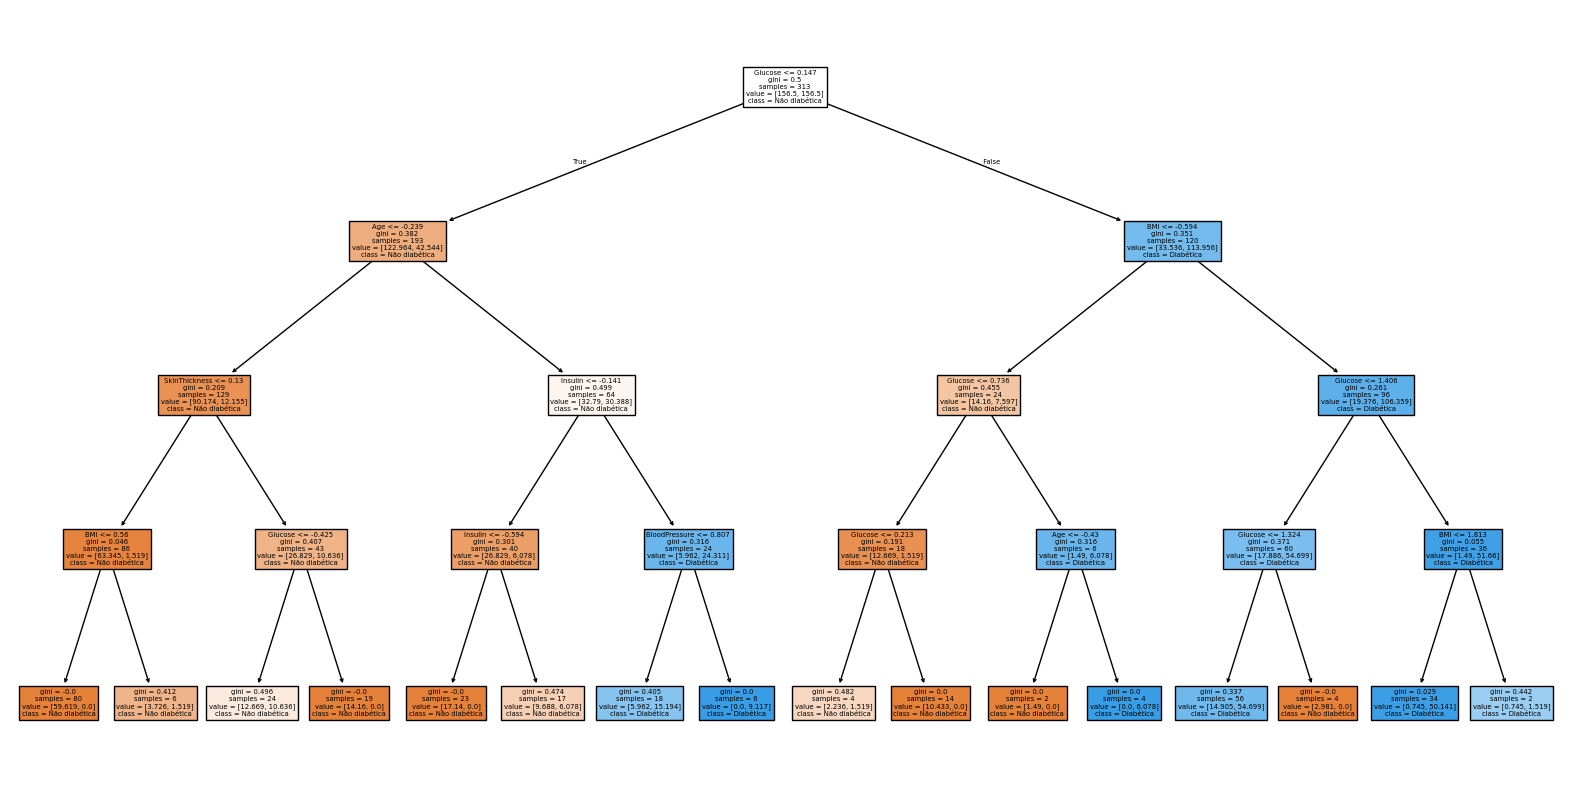

In [27]:
# Dando uma olhada na √°rvore com 4 ramifica√ß√µes que criamos:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(modelo_arvore, feature_names=X.columns, class_names=['N√£o diab√©tica', 'Diab√©tica'], filled=True)
plt.show()


In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Acur√°cia:", accuracy_score(y_teste, y_pred))
print("\nRelat√≥rio de Classifica√ß√£o:\n", classification_report(y_teste, y_pred))
print("\nMatriz de Confus√£o:\n", confusion_matrix(y_teste, y_pred))


Acur√°cia: 0.7468354430379747

Relat√≥rio de Classifica√ß√£o:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80        52
           1       0.61      0.70      0.66        27

    accuracy                           0.75        79
   macro avg       0.72      0.74      0.73        79
weighted avg       0.76      0.75      0.75        79


Matriz de Confus√£o:
 [[40 12]
 [ 8 19]]


### Interpreta√ß√£o dos dados:

#### Acur√°cia:
0.7468 (ou 75%)
O modelo acerta 75% dos casos. √â uma boa base, mas como h√° desbalanceamento nos dados, √© importante olhar tamb√©m para outras m√©tricas.

### Matriz de Confus√£o:
|            | **Predito 0** | **Predito 1** |
| ---------- | ------------- | ------------- |
| **Real 0** | 40            | 12            |
| **Real 1** | 8             | 19            |

Verdadeiros negativos (TN): 40
Falsos positivos (FP): 12
Falsos negativos (FN): 8
Verdadeiros positivos (TP): 19

#### Interpreta√ß√£o detalhada:

##### Classe 0 (n√£o diab√©tico):
Precis√£o: 83% ‚Üí quando o modelo disse "n√£o √© diab√©tico", estava certo em 83% dos casos.
Recall: 77% ‚Üí entre os que realmente n√£o s√£o diab√©ticos, o modelo acertou 77%.

##### Classe 1 (diab√©tico):
Precis√£o: 61% ‚Üí entre os que o modelo previu como diab√©ticos, 61% realmente eram.
Recall: 70% ‚Üí entre os diab√©ticos reais, o modelo capturou 70%.

##### F1-Score:
√â a m√©dia harm√¥nica entre precis√£o e recall.
Classe 0: 0.80
Classe 1: 0.66

O modelo est√° melhor para a classe 0 (o que √© esperado, pois ela tem mais exemplos no treino).

##### Considera√ß√µes:
O modelo est√° equilibrado. O class_weight='balanced' ajudou bem.
O recall para a classe 1 (diab√©ticos) √© 70%, o que √© muito bom para um primeiro modelo.

Se o objetivo for detectar casos de diabetes com mais seguran√ßa, podermos tentar aumentar o recall da classe 1 (mesmo que √† custa de precis√£o), pois √© melhor um falso positivo do que um falso negativo nesse contexto. Ou treinar outro modelo:


## Treinando o modelo RandonForestClassifier:

A id√©ia √© comparar se haver√° melhora no desempenho com rela√ß√£o ao DecisionTreeClassifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(random_state=42, class_weight='balanced')
modelo_rf.fit(X_treino, y_treino)

y_pred_rf = modelo_rf.predict(X_teste)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Acur√°cia:', accuracy_score(y_teste, y_pred_rf))
print('\nRelat√≥rio de Classifica√ß√£o:\n', classification_report(y_teste, y_pred_rf))

print('\nMatriz de Confus√£o:\n', confusion_matrix(y_teste, y_pred_rf))


Acur√°cia: 0.7468354430379747

Relat√≥rio de Classifica√ß√£o:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        52
           1       0.67      0.52      0.58        27

    accuracy                           0.75        79
   macro avg       0.72      0.69      0.70        79
weighted avg       0.74      0.75      0.74        79


Matriz de Confus√£o:
 [[45  7]
 [13 14]]


In [31]:
# Testando alguns hiperpar√¢metros:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Dicion√°rio de hiperpar√¢metros a serem testados
param_grid = {
    'n_estimators': [50, 100, 200],  # n√∫mero de √°rvores da floresta
    'max_depth': [4, 6, 8, None],    # limita quantos n√≠veis cada √°rvore pode ter
    'min_samples_split': [2, 5, 10], # Define o m√≠nimo de amostras necess√°rio para que um n√≥ possa ser dividido. Valores maiores deixam as √°rvores menos profundas e mais generalistas, reduzindo overfitting.
    'min_samples_leaf': [1, 2, 4],   # Controla o m√≠nimo de dados que um n√≥ final (folha) precisa conter.
    'class_weight': ['balanced']     # Corrige o desequil√≠brio entre classes automaticamente com base na frequ√™ncia. Essencial quando, por exemplo, temos muitos mais casos negativos (n√£o diab√©ticos) do que positivos.
}

# Modelo base
rf = RandomForestClassifier(random_state=42)

# GridSearchCV com valida√ß√£o cruzada de 5 folds
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Treina o GridSearch com os dados j√° padronizados
grid_search.fit(X_treino_scaled, y_treino)

# Exibe os melhores par√¢metros encontrados
print("Melhores par√¢metros encontrados:")
print(grid_search.best_params_)

# Avalia no conjunto de teste
melhor_modelo = grid_search.best_estimator_
y_pred = melhor_modelo.predict(X_teste_scaled)

# M√©tricas
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("\nAcur√°cia:", accuracy_score(y_teste, y_pred))
print("\nRelat√≥rio de Classifica√ß√£o:\n", classification_report(y_teste, y_pred))
print("\nMatriz de Confus√£o:\n", confusion_matrix(y_teste, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Melhores par√¢metros encontrados:
{'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Acur√°cia: 0.7468354430379747

Relat√≥rio de Classifica√ß√£o:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        52
           1       0.67      0.52      0.58        27

    accuracy                           0.75        79
   macro avg       0.72      0.69      0.70        79
weighted avg       0.74      0.75      0.74        79


Matriz de Confus√£o:
 [[45  7]
 [13 14]]


### Comparativo de Modelos: RandomForest vs DecisionTreeClassifier

#### Acur√°cia
Ambos os modelos apresentaram **acur√°cia de 0.7468 (‚âà 75%)**, acertando cerca de 3 a cada 4 previs√µes.  
Entretanto, os detalhes por classe revelam diferen√ßas importantes na forma como cada modelo comete erros.

---

#### Matrizes de Confus√£o

#### üü¢ RandomForest

|                 | **Predito: N√£o diab√©tico (0)** | **Predito: Diab√©tico (1)** |
|-----------------|-------------------------------|----------------------------|
| **Real: N√£o**   | 45 (TN)                        | 7 (FP)                     |
| **Real: Sim**   | 13 (FN)                        | 14 (TP)                    |

#### üü† DecisionTreeClassifier

|                 | **Predito: N√£o diab√©tico (0)** | **Predito: Diab√©tico (1)** |
|-----------------|-------------------------------|----------------------------|
| **Real: N√£o**   | 40 (TN)                        | 12 (FP)                    |
| **Real: Sim**   | 8 (FN)                         | 19 (TP)                    |

---

###  Relat√≥rios de Classifica√ß√£o

####  RandomForest

**Classe 0 (N√£o diab√©tico):**
- Precis√£o: 78%
- Recall: 87%
- F1-Score: 82%

**Classe 1 (Diab√©tico):**
- Precis√£o: 67%
- Recall: 52%
- F1-Score: 58%

---

####  DecisionTreeClassifier

**Classe 0 (N√£o diab√©tico):**
- Precis√£o: 83%
- Recall: 77%
- F1-Score: 80%

**Classe 1 (Diab√©tico):**
- Precis√£o: 61%
- Recall: 70%
- F1-Score: 66%

---

### Compara√ß√£o Direta

| M√©trica               | RandomForest | DecisionTree |
|-----------------------|--------------|---------------|
| **Precis√£o Classe 1** | 67%          | 61%           |
| **Recall Classe 1**   | 52%          | 70%           |
| **F1-Score Classe 1** | 58%          | 66%           |

---

### Conclus√£o

- O **RandomForest** adota uma postura **mais conservadora**, s√≥ "acusa" diabetes quando est√° mais certo disso.  
  Isso melhora a **precis√£o**, mas pode deixar passar alguns casos reais (menor recall).

- O **DecisionTreeClassifier** √© **mais sens√≠vel**, detectando mais casos reais de diabetes (maior recall),  
  mesmo que isso gere mais alarmes falsos (menor precis√£o).

###  Pondera√ß√µes:
Se o objetivo for **n√£o deixar passar casos reais de diabetes** (alta sensibilidade),  
o **DecisionTree** pode ser mais indicado.

Se o objetivo for **evitar falsos positivos** e s√≥ alertar com mais certeza,  
o **RandomForest** oferece **maior precis√£o**.

In [32]:
# Obtem as probabilidades da classe 1 (diab√©ticos)
y_prob = melhor_modelo.predict_proba(X_teste_scaled)[:, 1]


In [33]:
# Testando diferentes threshold para ver onde fica o melhor equi√≠brio de precis√£o x recall

from sklearn.metrics import classification_report, confusion_matrix

def avaliar_threshold(thresh):
    y_pred_thresh = (y_prob >= thresh).astype(int)

    print(f"\n--- Threshold = {thresh} ---")
    print("Matriz de Confus√£o:")
    print(confusion_matrix(y_teste, y_pred_thresh))
    print("\nRelat√≥rio de Classifica√ß√£o:")
    print(classification_report(y_teste, y_pred_thresh, digits=3))


In [34]:
for thresh in [0.50, 0.45, 0.40, 0.35, 0.30]:
    avaliar_threshold(thresh)


--- Threshold = 0.5 ---
Matriz de Confus√£o:
[[45  7]
 [13 14]]

Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0      0.776     0.865     0.818        52
           1      0.667     0.519     0.583        27

    accuracy                          0.747        79
   macro avg      0.721     0.692     0.701        79
weighted avg      0.739     0.747     0.738        79


--- Threshold = 0.45 ---
Matriz de Confus√£o:
[[45  7]
 [10 17]]

Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0      0.818     0.865     0.841        52
           1      0.708     0.630     0.667        27

    accuracy                          0.785        79
   macro avg      0.763     0.748     0.754        79
weighted avg      0.781     0.785     0.781        79


--- Threshold = 0.4 ---
Matriz de Confus√£o:
[[42 10]
 [ 7 20]]

Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support


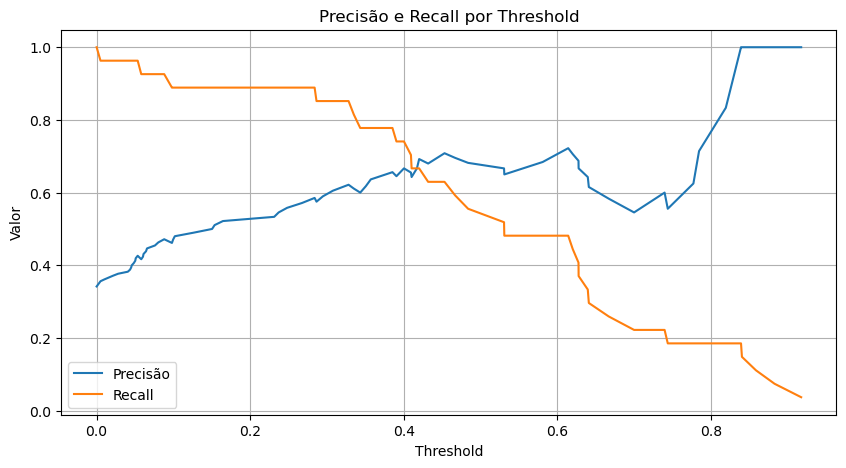

In [35]:
# Imprimindo a rela√ß√£o de Precis√£o x Recall nos diferentes thresholds

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precisao, recall, thresholds = precision_recall_curve(y_teste, y_prob)

plt.figure(figsize=(10, 5))
plt.plot(thresholds, precisao[:-1], label='Precis√£o')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Valor')
plt.title('Precis√£o e Recall por Threshold')
plt.legend()
plt.grid(True)
plt.show()


### Explicando o Threshold e a Acur√°cia do Modelo
#### Objetivo do Modelo
O objetivo deste modelo preditivo √© estimar com o maior grau de veracidade poss√≠vel se um paciente apresenta indicativos de diabetes, com base em dados cl√≠nicos previamente coletados.

Embora a precis√£o e o recall sejam importantes, o foco principal √© obter uma boa acur√°cia geral, que reflita um equil√≠brio entre n√£o gerar alarmes falsos e n√£o deixar de identificar casos relevantes.

#### Sobre a escolha do Threshold (limiar de decis√£o)
O modelo de classifica√ß√£o atribui a cada pessoa uma probabilidade de ser diab√©tica. O limiar padr√£o para classificar algu√©m como ‚Äúpositivo‚Äù (diab√©tico) √© 50%. No entanto, para este projeto, utilizando o RandomForest, adotamos um threshold de 43%.

Isso significa que:
Se a probabilidade predita for igual ou maior que 43%, o paciente ser√° classificado como ‚Äúpossivelmente diab√©tico‚Äù.
Essa escolha busca equilibrar a precis√£o (evitar falsos alarmes) com o recall (detectar corretamente casos reais).

#### Justificativa estat√≠stica
No ponto de 43%, o modelo atinge um equil√≠brio relevante entre:
Precis√£o ‚âà Recall
Acur√°cia global ‚âà 77%
F1-score da classe positiva (diab√©tico): 0.679
Optar por esse threshold permite uma comunica√ß√£o clara:

"Com base em dados cl√≠nicos, este modelo aponta risco elevado de diabetes quando a chance estimada for igual ou superior a 43%. Essa decis√£o √© apoiada por m√©tricas de desempenho que equilibram o risco de alarmes falsos e o de omiss√µes."

#### Importante:
Este modelo n√£o substitui diagn√≥stico m√©dico. Ele pode servir como ferramenta auxiliar para triagem inicial, orienta√ß√£o de exames ou tomada de decis√£o preventiva. O uso respons√°vel exige sempre interpreta√ß√£o conjunta com profissionais da sa√∫de.

### Detectando se houve overfiting nos dados de treino:

In [36]:
# Olhando o resultado do aprendizado de m√°quina sobre os dados de treino tamb√©m, para ver se houve overfiting.

# Predi√ß√£o nos dados de treino
y_pred_treino = melhor_modelo.predict(X_treino_scaled)

# Relat√≥rio de classifica√ß√£o
print("== Desempenho no CONJUNTO DE TREINO ==")
print("\nMatriz de Confus√£o:")
print(confusion_matrix(y_treino, y_pred_treino))

print("\nRelat√≥rio de Classifica√ß√£o:")
print(classification_report(y_treino, y_pred_treino, digits=3))

== Desempenho no CONJUNTO DE TREINO ==

Matriz de Confus√£o:
[[209   1]
 [  2 101]]

Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0      0.991     0.995     0.993       210
           1      0.990     0.981     0.985       103

    accuracy                          0.990       313
   macro avg      0.990     0.988     0.989       313
weighted avg      0.990     0.990     0.990       313



#### Conclus√£o sobre o desempenho nos dados de treino x dados de teste:
- O modelo apresentou **desempenho quase perfeito nos dados de treino**, o que **pode indicar overfitting**.
- No entanto, o desempenho no **conjunto de teste √© semelhante ao da DecisionTree**, indicando que **a generaliza√ß√£o ainda √© razo√°vel**.
- O uso de `class_weight='balanced'` continua essencial para lidar com o desbalanceamento da base.
- A alta discrep√¢ncia entre treino e teste sugere que o modelo poderia ser **regularizado melhor** para evitar aprendizado excessivamente espec√≠fico do conjunto de treino. Entretanto, muito dificilmente conseguiriamos melhores resultados sobre o conjunto de teste, visto que mesmo com um desempenho absurdamente excelente nos dados de treino, o melhor desempenho nos dados de teste √© praticamente igual nos dois algor√≠timos.
- Mesmo com overfitting, o desempenho no teste √© semelhante ao do modelo mais simples (DecisionTree)
Isso indica que o limite de aprendizado do modelo com os dados dispon√≠veis j√° foi atingido. Ou seja, mesmo que o modelo seja mais complexo, ele n√£o consegue extrair mais informa√ß√µes √∫teis para generalizar melhor.
- Regularizar o RandomForest pode reduzir overfitting, mas dificilmente vai melhorar muito a performance no teste
Ao aplicar regulariza√ß√£o (como limitar max_depth, min_samples_leaf, etc.), o modelo provavelmente vai perder desempenho no treino e ficar mais parecido com a √°rvore simples, sem trazer ganho real no teste. <br><br>


### Justificativa da Escolha do Modelo Final

Ap√≥s comparar os modelos treinados, optei por adotar o **DecisionTreeClassifier** como modelo final para predi√ß√£o de diabetes, com os seguintes fundamentos:

1. **Maior equil√≠brio entre desempenho no treino e no teste**  
   - A acur√°cia nos dados de treino foi de **86%**, e no teste de **74,7%**, uma diferen√ßa aceit√°vel e indicativa de **boa generaliza√ß√£o**.  
   - O modelo RandomForest, embora tenha apresentado acur√°cia de **99% no treino**, caiu para **74% no teste**, o que sugere **overfitting**.

2. **Melhor desempenho na identifica√ß√£o da classe positiva (diab√©ticos)**  
   - O **recall da classe 1** (diabetes) no DecisionTree foi de **70% no teste**, o que representa uma boa taxa de detec√ß√£o de casos positivos.  
   - Este √© o principal objetivo do modelo: **identificar corretamente indiv√≠duos com poss√≠vel diabetes**, mesmo que isso implique em alguns falsos positivos.

3. **Modelo mais simples, direto e sem necessidade de ajustes de threshold**  
   - O modelo RandomForest, para se aproximar de um desempenho semelhante, exigiria **ajustes manuais de threshold**, o que **aumenta a complexidade operacional**.  
   - O DecisionTree j√° atinge **bons resultados sem essa necessidade**, sendo, portanto, **mais pr√°tico e transparente** para uso em ambiente de produ√ß√£o ou avalia√ß√£o.


In [37]:
# Salva o modelo treinado:

# Optando pelo modelo do algoritimo DecisionTreeClassifier, pois apresenta mais equilibrio na rela√ß√£o treino x teste (sem overfitting) e melhor desempenho
# no resultado positivo para diabetes, que √© o objetivo deste modelo, sem necessidade de ajuste de Threshold para melhorar esta rela√ß√£o, como foi o caso
# do modelo RandomForest.

import joblib

joblib.dump(modelo_arvore, 'modelos/modelo_decision_tree_classifier.pkl')

['modelos/modelo_decision_tree_classifier.pkl']

In [38]:
# Salva o scaler treinado

import joblib

joblib.dump(scaler, 'modelos/scaler_standard.pkl')


['modelos/scaler_standard.pkl']